In [2]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")

In [5]:
# define the state
class BlogState(TypedDict):
    topic: str
    outline: str
    content: str

In [6]:
def create_outline(state: BlogState) -> BlogState:

    # fetch topic from the state
    topic = state['topic']

    # crate a prompt
    prompt = f"Generate an outline for a blog on the topic: {topic}"

    # send the prompt to the llm
    outline = model.invoke(prompt).content

    # update the answer in the state
    state['outline'] = str(outline)

    return state

In [7]:
def create_blog(state: BlogState) -> BlogState:

    # fetch topic from the state
    outline = state['outline']

    # crate a prompt
    prompt = f"""
                Generate a blog following the outline below:
                {outline}"""

    # send the prompt to the llm
    blog = model.invoke(prompt).content

    # update the answer in the state
    state['content'] = str(blog)

    return state

In [10]:
# define the graph
graph = StateGraph(BlogState)

# add nodes to the graph
graph.add_node("create outline", create_outline)
graph.add_node("create blog", create_blog)

# add edges to the graph
graph.add_edge(START, "create outline")
graph.add_edge("create outline", "create blog")
graph.add_edge("create blog", END)

# compile the graph
workflow = graph.compile()

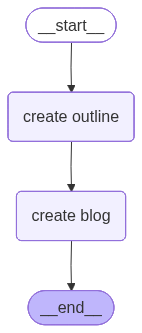

In [11]:
from IPython.display import Image, display

display(Image(workflow.get_graph().draw_mermaid_png()))

In [14]:
output = workflow.invoke({'topic': "LangGraph"})

In [16]:
output['content']

'## LangGraph: The Missing Piece for Complex AI Workflows\n\nEver found yourself wrestling with complex sequences of LLM calls? Building AI agents that need to remember, plan, and adapt can feel like juggling. While traditional LLM chaining is a fantastic starting point, what happens when your AI needs to make decisions, loop through processes, or manage intricate states? This is where things can get… complicated.\n\nThe truth is, building sophisticated AI applications often goes beyond simple linear execution. You need an orchestration layer that can handle dynamic behavior, branching logic, and persistent memory. This is precisely the problem LangGraph solves.\n\n**LangGraph is a powerful extension of LangChain that brings the power of state machines to LLM application development.** It empowers you to build dynamic, stateful, and complex AI workflows that were previously cumbersome or even impossible to implement efficiently.\n\nIn this post, we\'ll dive deep into what LangGraph is,